<a href="https://colab.research.google.com/github/Abdullahzulfiqarxyz/MathsStats/blob/main/academic_performance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your dataset
df = pd.read_csv('academic_performance_data.csv')

# Quick look at data
df.head()


,Student_ID,Department,GPA,Study_Hours_Per_Week,Participation_Level,Final_Exam_Score
0,S1000,Mathematics,3.04,22.1,Medium,83.2
1,S1001,Psychology,3.29,14.7,Low,76.5
2,S1002,Business,3.19,17.0,Medium,72.3
3,S1003,Psychology,3.09,28.0,Medium,99.6
4,S1004,Psychology,2.68,20.8,Medium,66.9


| Variable               | Type         | Measurement Scale |
| ---------------------- | ------------ | ----------------- |
| `Student_ID`           | Categorical  | Nominal           |
| `Department`           | Categorical  | Nominal           |
| `GPA`                  | Quantitative | Ratio             |
| `Study_Hours_Per_Week` | Quantitative | Ratio             |
| `Participation_Level`  | Categorical  | Ordinal           |
| `Final_Exam_Score`     | Quantitative | Ratio             |


In [ ]:
# Mean, Median, Mode
gpa_mean = df['GPA'].mean()
gpa_median = df['GPA'].median()
gpa_mode = df['GPA'].mode()[0]

exam_mean = df['Final_Exam_Score'].mean()
exam_median = df['Final_Exam_Score'].median()
exam_mode = df['Final_Exam_Score'].mode()[0]

print("GPA -> \nMean:", gpa_mean, "\nMedian:", gpa_median, "\nMode:", gpa_mode)




GPA -> 
Mean: 3.0273099999999995 
Median: 3.02 
Mode: 2.99


Observation:

The mean and median are almost identical → the GPA distribution is roughly symmetrical.

Mode is slightly lower (2.99), which is normal in a continuous variable like GPA.

 Conclusion: The mean is a good representative of central tendency for GPA. Median also works, but mean is more informative here.

In [ ]:

print("Final Exam -> \nMean:", exam_mean, "\nMedian:", exam_median, "\nMode:", exam_mode)

Final Exam -> 
Mean: 74.3584 
Median: 74.45 
Mode: 100.0


Observation:

Mean and median are close → roughly symmetrical, but not perfectly.

Mode is 100, which is far from the mean/median → indicates a spike at perfect scores (a common occurrence in exam scores).

Conclusion:

Mean and median are both reasonable to represent central tendency.

Mode is not representative here because it reflects only a single value (100) that is an outlier relative to most scores.

In [ ]:
# Variance & Standard Deviation
gpa_var = df['GPA'].var()
gpa_std = df['GPA'].std()
exam_var = df['Final_Exam_Score'].var()
exam_std = df['Final_Exam_Score'].std()

# IQR
gpa_iqr = df['GPA'].quantile(0.75) - df['GPA'].quantile(0.25)
exam_iqr = df['Final_Exam_Score'].quantile(0.75) - df['Final_Exam_Score'].quantile(0.25)

# Coefficient of Variation
gpa_cv = gpa_std / gpa_mean
exam_cv = exam_std / exam_mean

# Quartiles, Percentiles, 5-number summary
gpa_summary = df['GPA'].describe()
exam_summary = df['Final_Exam_Score'].describe()

print("GPA Variance:", gpa_var, "\nStd Dev:", gpa_std, "\nIQR:", gpa_iqr, "\nCV:", gpa_cv)
print("\n\nFinal Exam Variance:", exam_var, "\nStd Dev:", exam_std, "\nIQR:", exam_iqr, "\nCV:", exam_cv)
print("\n\nGPA Summary:\n", gpa_summary)
print("\n\nFinal Exam Summary:\n", exam_summary)


GPA Variance: 0.16045772162162186 
Std Dev: 0.4005717434138632 
IQR: 0.52 
CV: 0.13231936716552425


Final Exam Variance: 142.12507451451432 
Std Dev: 11.921622142750303 
IQR: 15.625 
CV: 0.1603265016830688


GPA Summary:
 count    1000.000000
mean        3.027310
std         0.400572
min         1.830000
25%         2.760000
50%         3.020000
75%         3.280000
max         4.000000
Name: GPA, dtype: float64


Final Exam Summary:
 count    1000.000000
mean       74.358400
std        11.921622
min        38.900000
25%        66.400000
50%        74.450000
75%        82.025000
max       100.000000
Name: Final_Exam_Score, dtype: float64


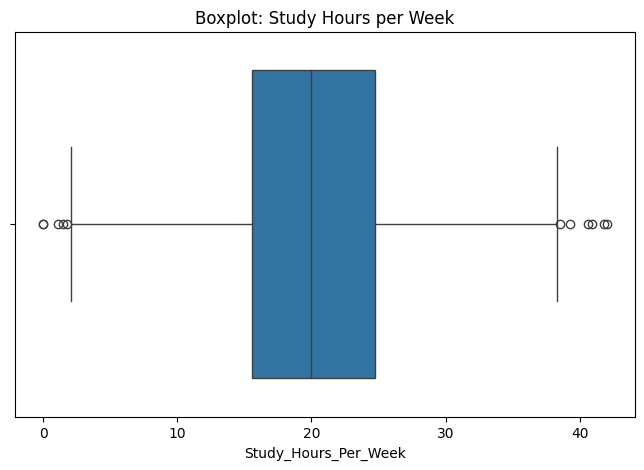

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Study_Hours_Per_Week'])
plt.title('Boxplot: Study Hours per Week')
plt.show()

There are outliers in the "Study_Hours_Per_Week" data set, specifically to the left (low end) around 0-5 hours and to the right (high end) around 40-42 hours,

In [ ]:
# Covariance
cov = np.cov(df['Study_Hours_Per_Week'], df['Final_Exam_Score'])[0,1]

# Pearson Correlation
corr = df['Study_Hours_Per_Week'].corr(df['Final_Exam_Score'])

print("Covariance:", cov)
print("Correlation:", corr)

Covariance: -1.6533206006006
Correlation: -0.020340572746153248


Covariance: -1.6533

Slightly negative → as Study_Hours_Per_Week increases, Final_Exam_Score tends to decrease very slightly, but the scale of covariance depends on the units, so it’s not very informative alone.

Correlation (Pearson r): -0.0203

This is almost zero → indicates essentially no linear relationship between study hours and final exam score in your dataset.

Negative sign is tiny and practically negligible.

Conclusion:

Contrary to expectation, studying more hours does not strongly predict higher exam scores here.

Factors like study quality, prior knowledge, participation, or exam difficulty might matter more than sheer study hours.

In [ ]:
sample_df = df.sample(n=300, random_state=42)


In [ ]:
# Define the model
model = ols('GPA ~ C(Department)', data=sample_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                  sum_sq     df         F    PR(>F)
C(Department)   0.729900    4.0  1.022296  0.395974
Residual       52.656138  295.0       NaN       NaN


There is no statistically significant difference in GPA across departments in your sample.

Any observed differences in means are likely due to random variation rather than a true departmental effect.